In [18]:
import numpy as np
import matplotlib.pyplot as plt
from css_dla import Model
import numpy as np
from scipy import stats

In [19]:
model = Model(mode='single', w=1000, h=1000)

In [20]:
import cProfile
import re
model = Model(mode='single', w=1000, h=1000)
# model.loop(1)
cProfile.run('model.loop(1000)', 'restats')

In [21]:
import pstats
from pstats import SortKey
p = pstats.Stats('restats')
p.sort_stats(SortKey.CUMULATIVE).print_stats("focal_attraction")

Tue Jan 30 10:08:16 2024    restats

         49877487 function calls in 41.401 seconds

   Ordered by: cumulative time
   List reduced from 36 to 1 due to restriction <'focal_attraction'>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1060989    7.349    0.000   14.097    0.000 /Users/haha/complex-system-simulation-group-16/css_dla/main.py:141(focal_attraction)




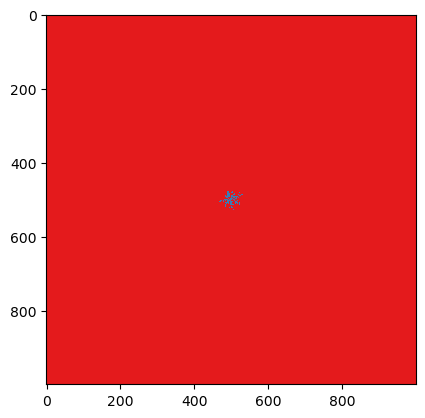

In [22]:
# plot the grid
plt.imshow(model.grid, cmap='Set1')
plt.clim(0,10)
plt.show()

In [23]:
model.loop(4000)

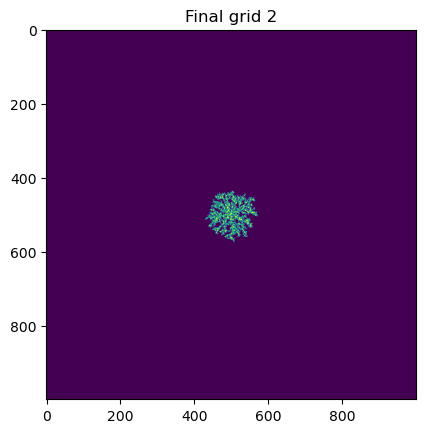

In [24]:
plt.imshow(model.grid)
plt.title("Final grid 2")
plt.show()

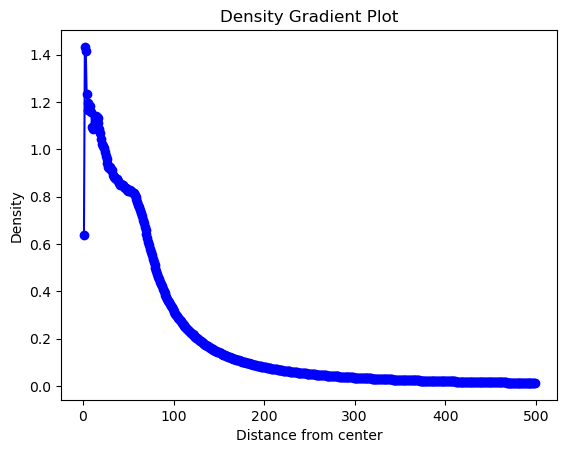

In [25]:
distances, densities = model.density_gradient()

plt.plot(distances, densities, '-o', color='blue')
plt.xlabel('Distance from center')
plt.ylabel('Density')
plt.title('Density Gradient Plot')
plt.show()

In [26]:
import powerlaw

# Fit the distance data using powerlaw
results = powerlaw.Fit(densities)

# Retrieve the parameters of the power-law distribution and comparison results
print('Power-law exponent alpha:', results.power_law.alpha)
print('Minimum value for power-law distribution xmin:', results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'exponential')
print('Comparison result R between power-law and exponential distributions:', R)
print('p-value:', p)


Calculating best minimal value for power law fit
Power-law exponent alpha: 1.567303872154484
Minimum value for power-law distribution xmin: 0.012786034921989367
Comparison result R between power-law and exponential distributions: 196.4223791195704
p-value: 1.2850472395493586e-16


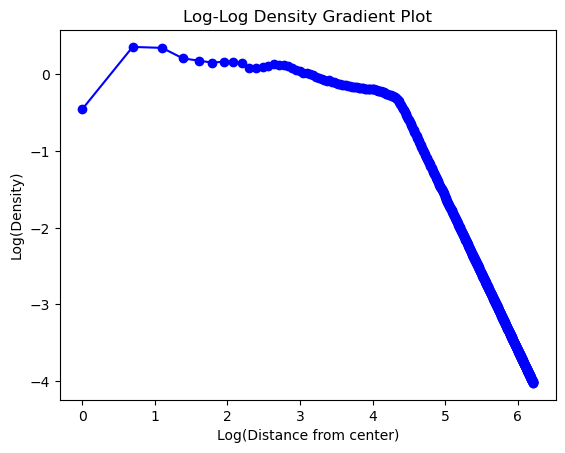

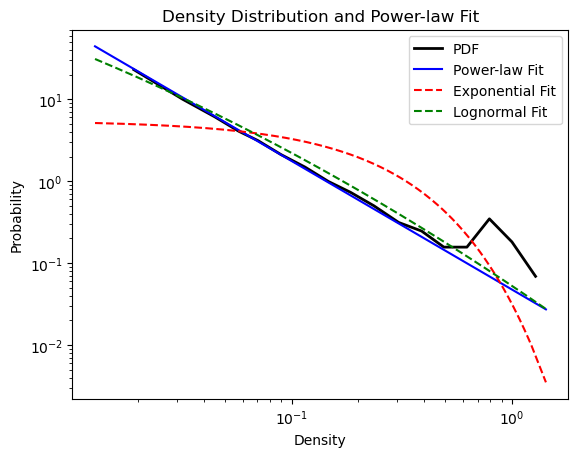

In [37]:
# Convert to log scale
log_distances = np.log(distances)
log_densities = np.log(densities)

plt.plot(log_distances, log_densities, '-o', color='blue')
plt.xlabel('Log(Distance from center)')
plt.ylabel('Log(Density)')
plt.title('Log-Log Density Gradient Plot')
fig, ax = plt.subplots()
results.plot_pdf(color='black', linewidth=2, label = 'PDF') #Probability Density Function
results.power_law.plot_pdf(color='b', ax=ax, label='Power-law Fit') 
results.exponential.plot_pdf(color='r', linestyle='--', ax=ax, label='Exponential Fit')  
results.lognormal.plot_pdf(color='g', linestyle='--', ax=ax, label='Lognormal Fit') 
plt.xlabel('Density')
plt.ylabel('Probability')
plt.title('Density Distribution and Power-law Fit')
plt.legend() 
plt.show()

In [28]:
fractal_dimension = model.get_fractal_dim()

In [29]:
print(fractal_dimension)
'''
The result is 1.08, which shows that：
1. The urban model is slightly more complex than a simple line, but far from the complexity of a fully filled two-dimensional plane. This implies that urban growth exhibits a certain degree of self-similarity and structured characteristics, although these features are not very dense or complex.

2. A fractal dimension greater than 1 but less than 2 indicates that urban growth is between one-dimensional and two-dimensional, possibly presenting linear or cluster-like expansions, rather than a uniform plane filling.

3. The values may suggest that the city grows along certain axes or paths, such as along rivers, roads, or other geographical features, but it does not fully occupy the space.
'''

1.0813546535783647


In [30]:
res = []
for _ in range(10):
    model.loop(100)
    f = model.get_fractal_dim()
    res.append(f)
    print(f)
'''
result increase - structure developed
1d-2d - maybe with the developed of the model, the structure could be more complex and disperse
2 > fractal dimension > 1 - self-similarity maybe not very dense
'''

1.0843648337349485
1.0915175826050545
1.0943009601009546
1.097445000930012
1.1021202705763844
1.1043700772720428
1.1071133864823508
1.1103054736926816
1.1145968585612802
1.1187070663957703


In [31]:
density_res = []
fractal_res = []

num_runs = 10

for _ in range(num_runs):
    model.loop(100)
    _, densities = model.density_gradient() # only need density, so ignore first return value
    density_res.append(densities)
    
    fractal_dim = model.get_fractal_dim()
    fractal_res.append(fractal_dim)

    print(densities)
    print(fractal_dim)


[0.6366197723675814, 1.432394487827058, 1.414710605261292, 1.233450808962189, 1.196845172051053, 1.167136249340566, 1.1822938629683655, 1.1837148892459717, 1.1553469942967216, 1.09498600847224, 1.0838320091547253, 1.0964007190775014, 1.1150263468686632, 1.1400690821480666, 1.1374273266300787, 1.1314921735439434, 1.1102296376237406, 1.084611464033657, 1.066911252859797, 1.0424648772519145, 1.0220562331887701, 1.0154348435284561, 1.007279299568366, 0.9869816957018231, 0.9717364205418763, 0.9586966394529554, 0.9440136816589237, 0.925697117983473, 0.9189731315746061, 0.9259280911435155, 0.912201276326909, 0.9107890298032292, 0.8932552912558901, 0.8833374696173015, 0.8793148202824063, 0.8733873111647837, 0.8742477516808276, 0.8724865162849331, 0.8651499470636362, 0.8566514811921268, 0.8505936994274764, 0.852074423219875, 0.8494002046678331, 0.8474014222062279, 0.8415956200632174, 0.836089956242679, 0.8357615843666754, 0.83390558724191, 0.8307079328728165, 0.8260778166241737, 0.8263084780903

In [32]:
density_res = np.array(density_res)
fractal_res = np.array(fractal_res)

# calculate mean and 95% confidence interval for densities and fractal dimensions
mean_densities = np.mean(density_res, axis=0)
ci_densities = stats.sem(density_res, axis=0) * stats.t.ppf((1 + 0.95) / 2., num_runs - 1)

mean_fractal_dim = np.mean(fractal_res)
ci_fractal_dim = stats.sem(fractal_res) * stats.t.ppf((1 + 0.95) / 2., num_runs - 1)

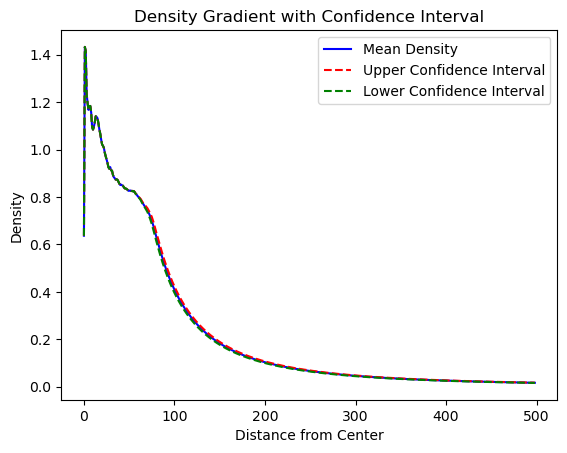

In [33]:
# plot for density gradient
plt.plot(mean_densities, label='Mean Density', color='blue')

upper_ci = mean_densities + ci_densities
lower_ci = mean_densities - ci_densities
plt.plot(upper_ci, label='Upper Confidence Interval', linestyle='--', color='red')
plt.plot(lower_ci, label='Lower Confidence Interval', linestyle='--', color='green')

plt.title('Density Gradient with Confidence Interval')
plt.xlabel('Distance from Center')
plt.ylabel('Density')
plt.legend()
plt.show()

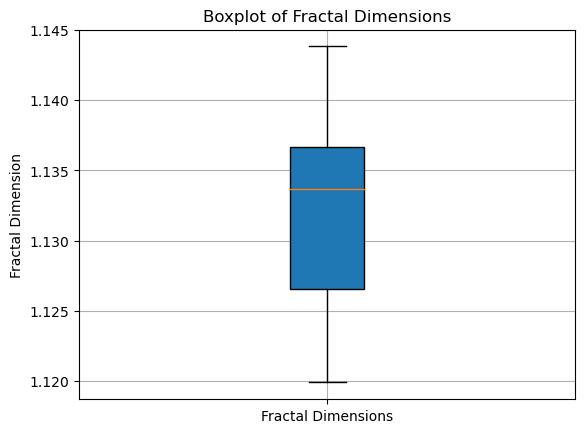

In [34]:
# plot for fractal dimensions
plt.boxplot(fractal_res, patch_artist=True)
plt.title('Boxplot of Fractal Dimensions')
plt.ylabel('Fractal Dimension')
plt.xticks([1], ['Fractal Dimensions'])
plt.grid(True)
plt.show()
